#Business Case :

###Mr Brain, the CEO of the INX Future Inc, wants us to create an interactive dashboard to analyse the employee performance indexes and identify the primary factors contributing to performance issues, specifically focusing on clear indicators of non-performing employees.

##Data Loading and Exploration:

###Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###Loading the employee performance dataset using Pandas.

In [2]:
df=pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


#Domain analysis :

1.EmpNumber: Unique identifier assigned to each employee

2.Age: Numerical variable indicating the age of the employee

3.Gender: Categorical variable indicating the gender of employees (Male or Female)

4.EducationBackground: Categorical variable specifying the educational background of employees

5.MaritalStatus: Categorical variable indicating the marital status of employees (Single, Married, Divorced)

6.EmpDepartment: Categorical variable specifying the department in which the employee works (Sales, Research & Development, Human Resources)

7.EmpJobRole: Categorical variable describing the specific job role or position of the employee

8.BusinessTravelFrequency: Categorical variable indicating the frequency of business travel for employees (Rarely, Frequently, Non-Travel)

9.DistanceFromHome: Numerical variable representing the distance of an employee's residence from the workplace

10.EmpEducationLevel: Categorical variable indicating the highest education level attained by the employee

11.EmpEnvironmentSatisfaction: Numerical variable indicating the satisfaction level of employees with their work environment

12.EmpHourlyRate: Numerical variable representing the hourly rate of pay for employees

13.EmpJobInvolvement: Numerical variable measuring the level of involvement or commitment an employee has in their job

14.EmpJobLevel: Numerical variable representing the job level or rank of the employee within the organization

15.EmpJobSatisfaction: Numerical variable indicating the satisfaction level of employees with their job

16.NumCompaniesWorked: Numerical variable indicating the number of companies the employee has worked for in the past

17.OverTime: Categorical variable indicating whether an employee works overtime (Yes or No)

18.EmpLastSalaryHikePercent: Numerical variable representing the percentage of the last salary hike for the employee

19.EmpRelationshipSatisfaction: Numerical variable measuring the satisfaction level of employees with their work relationships

20.TotalWorkExperienceInYears: Numerical variable representing the total work experience of the employee in years

21.TrainingTimesLastYear: Numerical variable indicating the number of training sessions attended by the employee in the last year

22.EmpWorkLifeBalance: Categorical variable indicating the perceived work-life balance of employees (Bad, Good, Better, Best)

23.ExperienceYearsAtThisCompany: Numerical variable representing the number of years the employee has worked at the current company

24.ExperienceYearsInCurrentRole: Numerical variable indicating the number of years the employee has been in their current role

25.YearsSinceLastPromotion: Numerical variable representing the number of years since the employee's last promotion

26.YearsWithCurrManager: Numerical variable representing the number of years the employee has been working with the current manager

27.Attrition: Categorical variable indicating whether an employee has left the company (Yes or No)

28.PerformanceRating: Categorical variable representing the performance rating of employees within the company (Low, Average, High)

In [3]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [4]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
df.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [6]:
df.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

### Checking missing values

In [9]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

###Checking Duplicates

In [10]:
df.duplicated().sum()

0

# Manual Encoding

In [11]:
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [12]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [13]:
df.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [14]:
df.MaritalStatus=df.MaritalStatus.map({'Married':2, 'Single':1,'Divorced':0})

In [15]:
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [16]:
df.EmpDepartment=df.EmpDepartment.map({'Sales':5,'Development':4,'Research & Development':3,'Human Resources':2,'Finance':1,'Data Science':0})

In [17]:
df.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [18]:
df.EmpJobRole=df.EmpJobRole.map({'Sales Executive':18, 'Developer':17, 'Manager R&D':16, 'Research Scientist':15, 'Sales Representative':14, 'Laboratory Technician':13, 'Senior Developer':12, 'Manager':11, 'Finance Manager':10, 'Human Resources':9, 'Technical Lead':8, 'Manufacturing Director':7, 'Healthcare Representative':6, 'Data Scientist':5, 'Research Director':4, 'Business Analyst':3, 'Senior Manager R&D':2, 'Delivery Manager':1, 'Technical Architect':0})

In [19]:
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [20]:
df.BusinessTravelFrequency=df.BusinessTravelFrequency.map({'Travel_Rarely':2, 'Travel_Frequently':1,'Non-Travel':0})

In [21]:
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [22]:
df.Attrition=df.Attrition.map({'No':1,'Yes':0})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   int64 
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   int64 
 5   EmpDepartment                 1200 non-null   int64 
 6   EmpJobRole                    1200 non-null   int64 
 7   BusinessTravelFrequency       1200 non-null   int64 
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [26]:
# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

##Data Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=[ 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
        'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime'
       , 'EmpRelationshipSatisfaction',
        'TrainingTimesLastYear',
       'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating']
data1=sc.fit_transform(df.drop(dl,axis=1))

In [28]:
data2=pd.DataFrame(data1,columns=['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany'])

In [29]:
con_data=df[['Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
        'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime'
       , 'EmpRelationshipSatisfaction',
        'TrainingTimesLastYear',
       'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating']]

In [30]:
df1=pd.concat([data2,con_data],axis=1)

#Feature Selection

In [31]:
df1.corr()

,Age,DistanceFromHome,EmpHourlyRate,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,Gender,MaritalStatus,EmpDepartment,EmpJobRole,...,EmpJobSatisfaction,NumCompaniesWorked,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,0.020937,0.062867,-0.006105,0.680886,0.318852,-0.040107,0.028983,-0.042295,-0.088325,...,-0.002436,0.284408,0.049749,-0.016053,-0.019563,0.217163,0.228199,0.205098,0.189317,-0.040164
DistanceFromHome,0.020937,1.000000,0.013730,0.044974,0.027306,0.021908,-0.001507,0.015542,-0.035802,-0.002498,...,-0.003036,-0.021411,-0.009509,-0.032082,-0.044788,0.019898,0.013246,0.017860,-0.063248,-0.046142
EmpHourlyRate,0.062867,0.013730,1.000000,-0.015934,0.026034,-0.000399,0.002218,0.010802,-0.013530,0.022010,...,-0.066417,0.040484,0.008783,-0.024160,0.016189,-0.011871,-0.010000,-0.004576,0.026313,-0.043116
EmpLastSalaryHikePercent,-0.006105,0.044974,-0.015934,1.000000,-0.005933,-0.019830,-0.005319,0.010378,-0.023807,-0.006769,...,0.031847,-0.011788,-0.042892,-0.013439,-0.017001,-0.004957,-0.015911,-0.007666,0.009448,0.333722
TotalWorkExperienceInYears,0.680886,0.027306,0.026034,-0.005933,1.000000,0.633555,-0.061055,0.000622,-0.022333,-0.122822,...,-0.026824,0.221505,0.018089,-0.022113,0.015495,0.460700,0.412781,0.460783,0.185226,-0.068141
ExperienceYearsAtThisCompany,0.318852,0.021908,-0.000399,-0.019830,0.633555,1.000000,-0.030392,-0.001639,0.026455,-0.036191,...,0.001807,-0.129797,0.015612,0.008564,0.023479,0.764102,0.620230,0.759258,0.142456,-0.111645
Gender,-0.040107,-0.001507,0.002218,-0.005319,-0.061055,-0.030392,1.000000,-0.013286,-0.024570,0.021370,...,0.024680,-0.036675,0.030707,-0.057654,0.015793,-0.031823,-0.021575,-0.036643,-0.035758,-0.001780
MaritalStatus,0.028983,0.015542,0.010802,0.010378,0.000622,-0.001639,-0.013286,1.000000,0.018313,0.024552,...,0.028628,-0.047466,-0.052917,-0.020050,-0.002060,0.024599,0.016567,-0.006072,0.028260,-0.039682
EmpDepartment,-0.042295,-0.035802,-0.013530,-0.023807,-0.022333,0.026455,-0.024570,0.018313,1.000000,0.526137,...,0.032903,-0.006743,0.025467,0.011192,0.030791,0.049500,0.042872,0.021713,-0.077275,-0.005205
EmpJobRole,-0.088325,-0.002498,0.022010,-0.006769,-0.122822,-0.036191,0.021370,0.024552,0.526137,1.000000,...,0.021862,-0.038749,0.007764,0.025189,0.012591,-0.001384,-0.001004,-0.024288,-0.096669,0.002002


<Axes: >

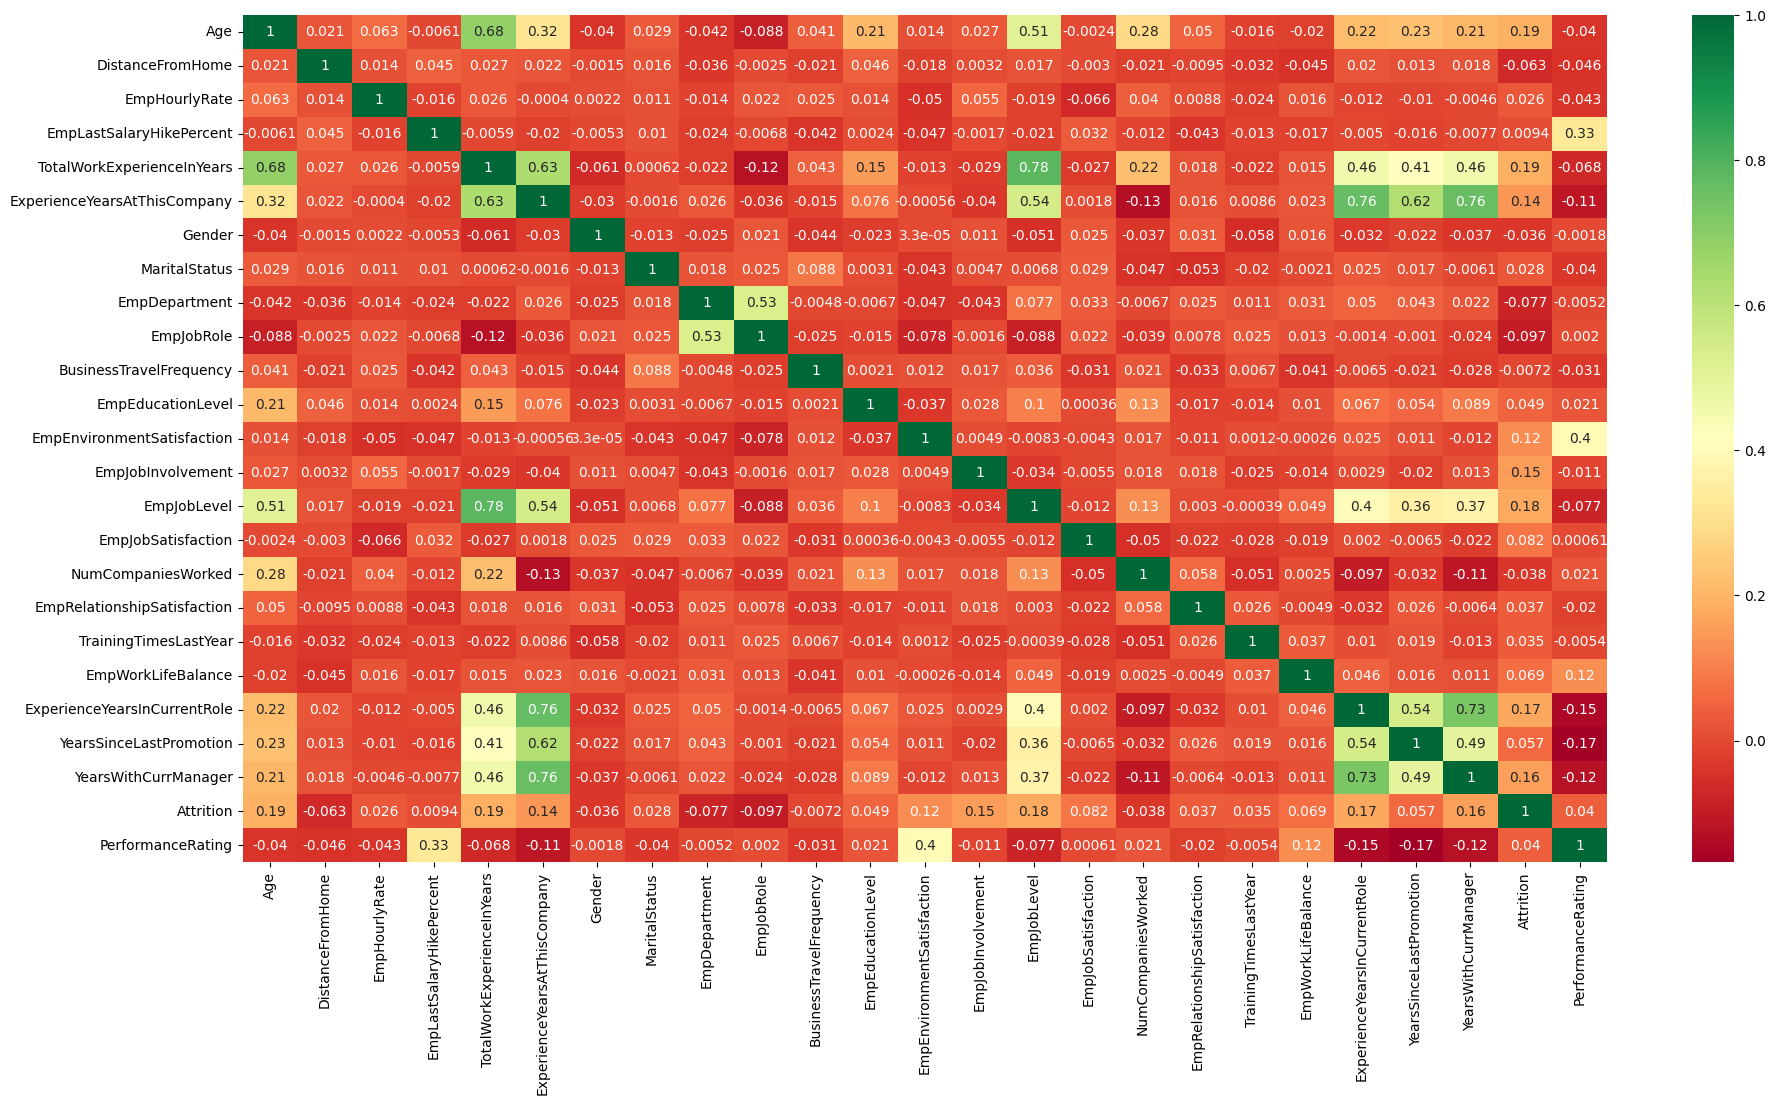

In [35]:
plt.figure(figsize=(22,11))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")